In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv("medical_examination.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
# Add 'overweight' column
df['overweight'] = (df["weight"] / ((df["height"] / 100) **2)).apply(lambda x : 1 if x >25 else 0)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [16]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
#If the value is more than 1, make the value 1.
df['cholesterol'] = df["cholesterol"].apply(lambda x : 0 if x == 1 else 1)
df['gluc'] = df["gluc"].apply(lambda x : 0 if x == 1 else 1)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,0,0,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,0,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,0,0,0,0,1,1


In [42]:
# Create DataFrame for cat plot using `pd.melt` 
#using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars = ["cardio"], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,1
1,1,cholesterol,0
2,1,cholesterol,0
3,1,cholesterol,1
4,0,cholesterol,1
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [43]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
#You will have to rename one of the columns for the catplot to work correctly.
df_cat['total'] = 1
df_cat = df_cat.groupby(["cardio", "variable", "value"], as_index = False).count()
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,5691
5,0,cholesterol,1,29330
6,0,gluc,0,4127
7,0,gluc,1,30894
8,0,overweight,0,15915
9,0,overweight,1,19106


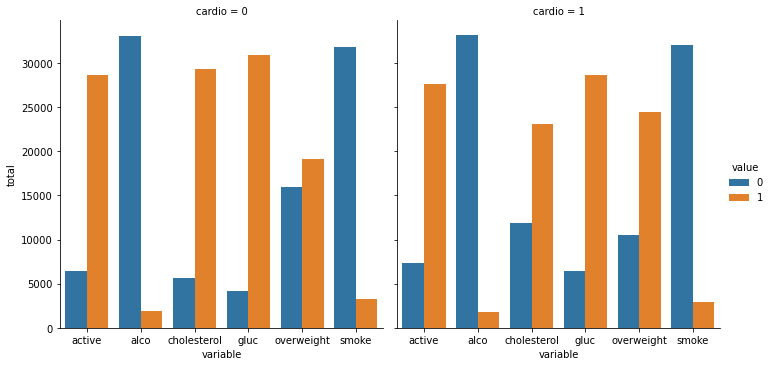

In [44]:
# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(x = "variable", y = "total", data = df_cat, hue = "value", kind = "bar", col = "cardio").fig

#return fig outside of function
fig.savefig('catplot.png')
return fig

Draw Heat Map

In [18]:
# Clean the data
df_heat = df[
      (df['ap_lo'] <= df['ap_hi']) &
      (df['height'] <= df['height'].quantile(0.025)) &
      (df['height'] <= df['height'].quantile(0.975)) &
      (df['weight'] <= df['weight'].quantile(0.025)) &
      (df['weight'] <= df['weight'].quantile(0.975))]


In [28]:
# Calculate the correlation matrix
corr = df_heat.corr(method="pearson")

In [32]:
 # Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

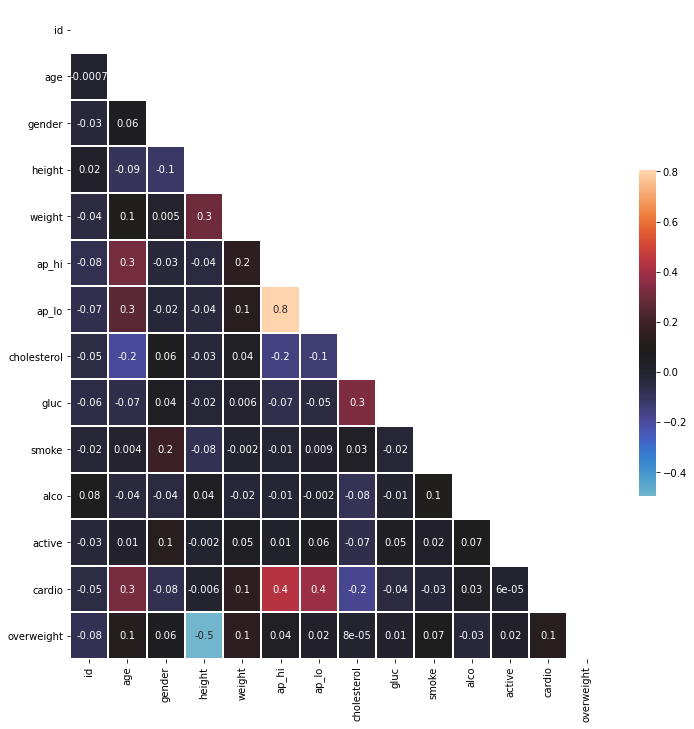

In [36]:

#with sns.axes_style("white"):
f, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr,linewidths=1, annot = True, mask = mask, fmt =".1", center = 0.08, cbar_kws = {"shrink":0.5})